In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.listdir('/content/drive/My Drive/mini project/datasets')


['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_products_dataset.csv',
 'product_category_name_translation.csv',
 'merged_dataset.csv']

In [4]:
import pandas as pd

# Load the merged dataset from the saved CSV file
merged_df = pd.read_csv('/content/drive/My Drive/mini project/datasets/merged_dataset.csv')
merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4.0,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5.0,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118302,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20 00:00:00,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,1,boleto,1,93.13,7f9849fcbfdf9fa3070c05b

In [5]:
# prompt: how to find nan in data set  and remove those column with empty

# Find NaN values in the dataset
nan_count = merged_df.isna().sum()
# Remove columns with all NaN values
merged_df = merged_df.dropna(axis=1, how='all')

In [6]:
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
churn_threshold_date = merged_df['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
merged_df['is_churn'] = (merged_df['order_purchase_timestamp'] < churn_threshold_date).astype(int)
churn_counts = merged_df['is_churn'].value_counts()
print(churn_counts)


is_churn
1    71667
0    46640
Name: count, dtype: int64


In [7]:
# Separate churn and non-churn customers
churn_df = merged_df[merged_df['is_churn'] == 1]
non_churn_df = merged_df[merged_df['is_churn'] == 0]

# Sample equal number of churn and non-churn customers
churn_sample = churn_df.sample(n=5500, random_state=42)
non_churn_sample = non_churn_df.sample(n=5500, random_state=42)

# Combine the samples
balanced_df = pd.concat([churn_sample, non_churn_sample])

# Check the class distribution
print(balanced_df['is_churn'].value_counts())


is_churn
1    5500
0    5500
Name: count, dtype: int64


In [61]:
balanced_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,is_churn,offers
73930,4797,3098,2,2017-02-15 22:46:50,206,190,166,32,256,11453,608,25,1,1088,566,200,48.00,11.74,1,1,1,59.74,1517,1.0,860,3641,42,160,40,39.0,1507.0,2.0,1100.0,20.0,20.0,20.0,3701,339,18,1,{'customer_zip_code_prefix': 'Offer to improve...
48290,9520,4527,2,2017-12-27 13:16:37,3972,3890,3843,245,4339,38600,1047,10,1,6219,719,3971,54.90,12.51,1,1,1,67.41,8429,3.0,860,4129,329,3892,50,40.0,124.0,1.0,450.0,24.0,47.0,34.0,31255,36,6,1,{'product_length_cm': 'Offer to improve produc...
70210,9608,9304,2,2017-04-09 13:43:53,543,521,501,71,1805,4433,1419,25,1,645,1437,526,48.90,15.56,1,1,1,64.46,8913,5.0,860,4129,89,496,50,38.0,238.0,1.0,700.0,16.0,40.0,30.0,37564,45,6,1,{'customer_zip_code_prefix': 'Offer to improve...
90626,8471,979,2,2018-01-19 09:36:02,4435,4397,4376,263,2329,85840,378,17,1,2511,1148,4439,39.97,16.11,1,1,5,56.08,8295,5.0,860,2078,354,4399,11,62.0,3621.0,1.0,800.0,20.0,15.0,15.0,14090,287,18,1,{'product_width_cm': 'Offer to improve product...
37115,1168,8582,2,2018-02-03 21:07:55,4733,4628,4542,271,6944,35162,659,10,1,5270,407,4732,49.00,17.60,1,1,6,66.60,9209,5.0,860,4129,364,4613,59,50.0,105.0,2.0,450.0,20.0,30.0,20.0,13232,64,18,1,{'product_width_cm': 'Offer to improve product...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43445,692,6978,2,2018-05-16 14:02:56,7695,7492,7712,335,5066,36950,658,10,1,4171,1079,7726,132.00,23.50,1,1,8,311.00,5339,5.0,860,4129,473,7785,11,42.0,693.0,1.0,1250.0,30.0,12.0,16.0,3702,339,18,0,{'product_width_cm': 'Offer to improve product...
81670,9364,4273,2,2018-03-11 21:03:00,5564,5424,5560,292,6403,89900,1418,23,1,6689,1597,5546,48.00,18.23,1,1,1,66.23,235,3.0,860,2280,407,5663,63,58.0,1312.0,1.0,700.0,23.0,29.0,11.0,13419,265,18,0,{'product_width_cm': 'Offer to improve product...
39552,5468,2201,2,2018-07-18 20:54:03,9233,8888,10049,381,3115,22713,1237,18,1,1142,210,9210,119.90,104.23,2,3,1,39.70,1055,4.0,141,462,539,9970,9,57.0,346.0,2.0,13700.0,55.0,30.0,55.0,15025,331,18,0,{'review_comment_title': 'Offer to improve rev...
36734,7856,1913,2,2018-08-20 18:12:53,10355,9872,10126,390,10213,13097,290,25,1,4686,407,10420,169.90,37.27,1,1,8,207.17,5943,4.0,294,1732,544,10202,59,59.0,226.0,5.0,8150.0,35.0,60.0,40.0,13232,64,18,0,{'review_comment_title': 'Offer to improve rev...


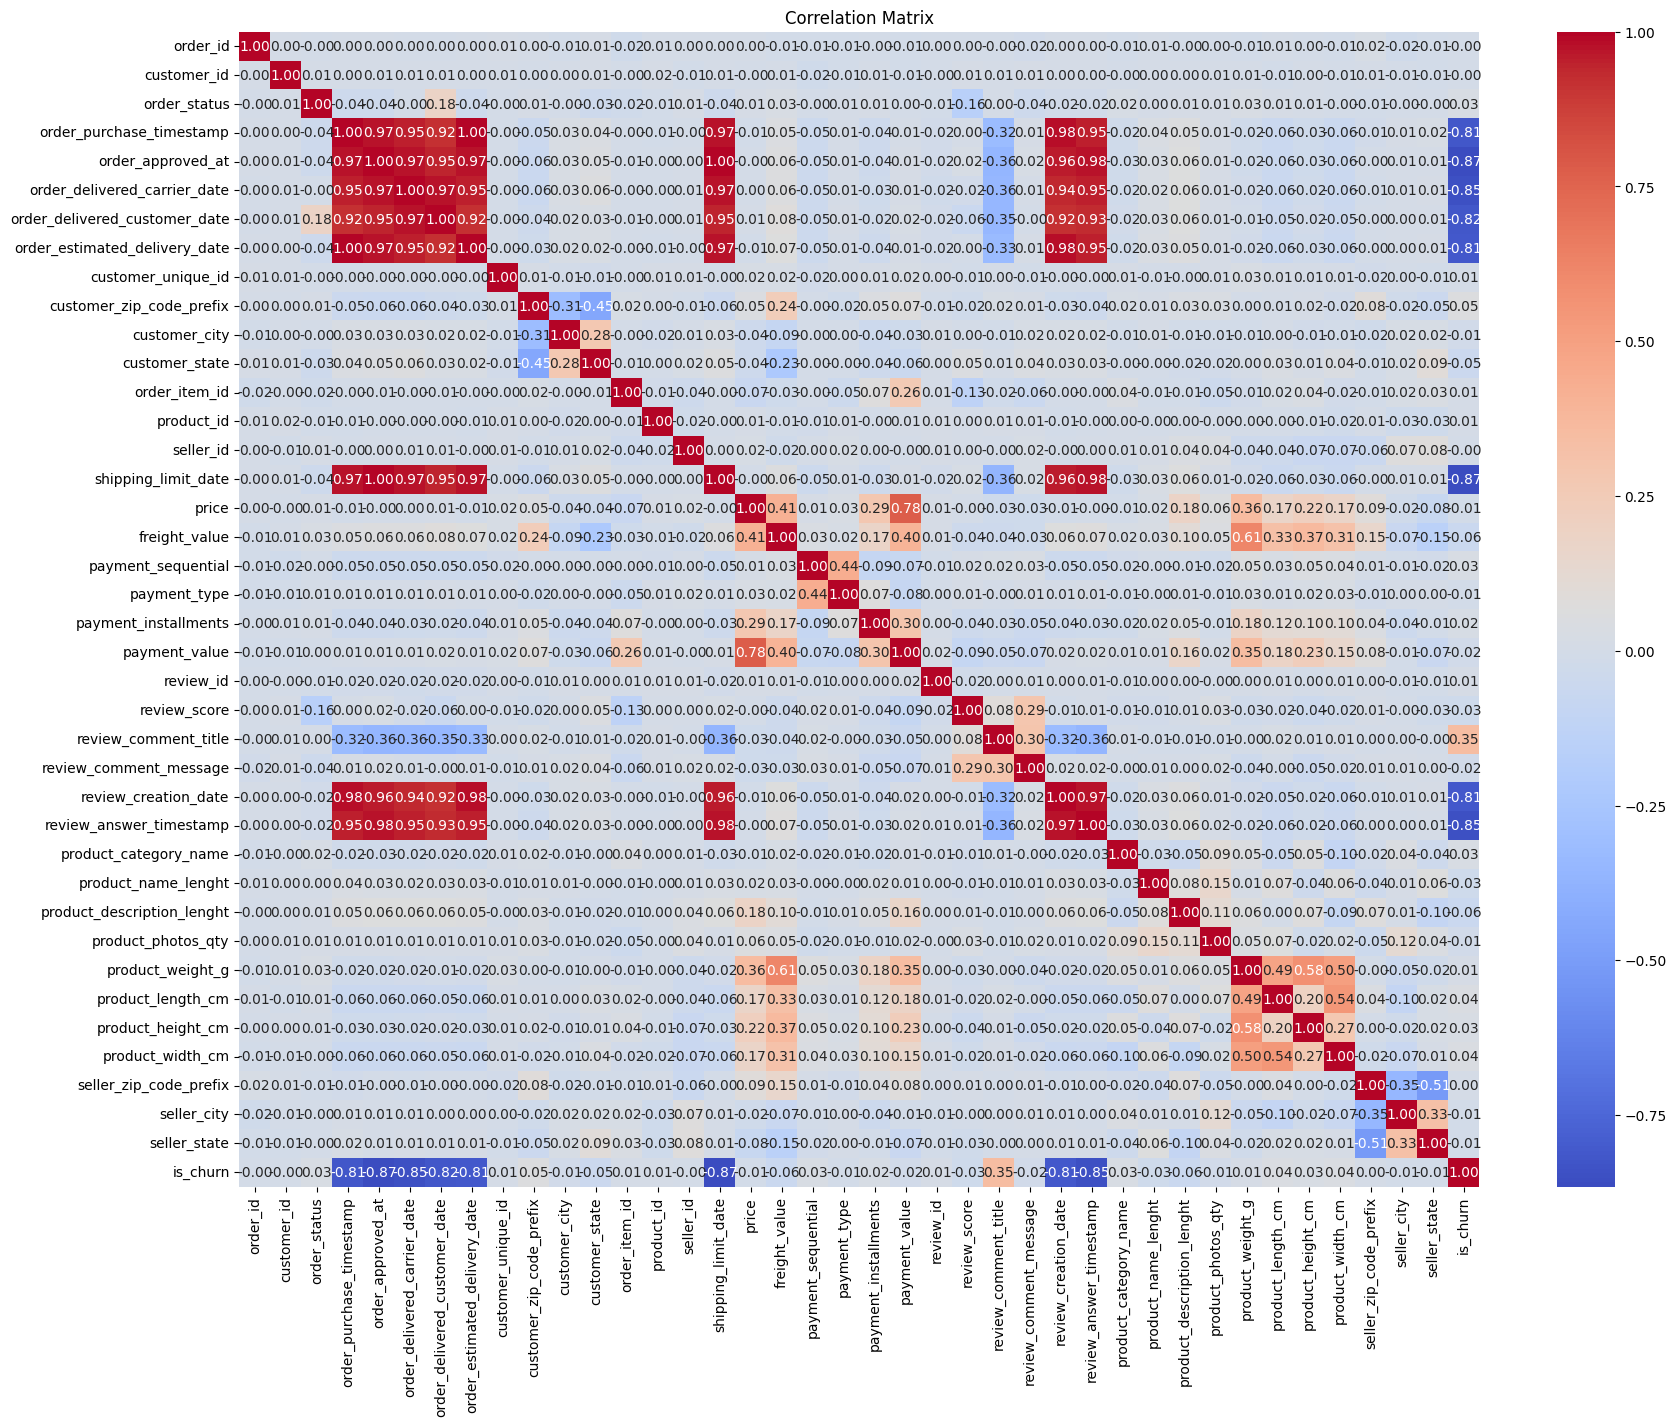

In [12]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to all categorical columns
for col in balanced_df.select_dtypes(include=['object']).columns:
  balanced_df[col] = le.fit_transform(balanced_df[col])

# Calculate the correlation matrix
corr_matrix = balanced_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


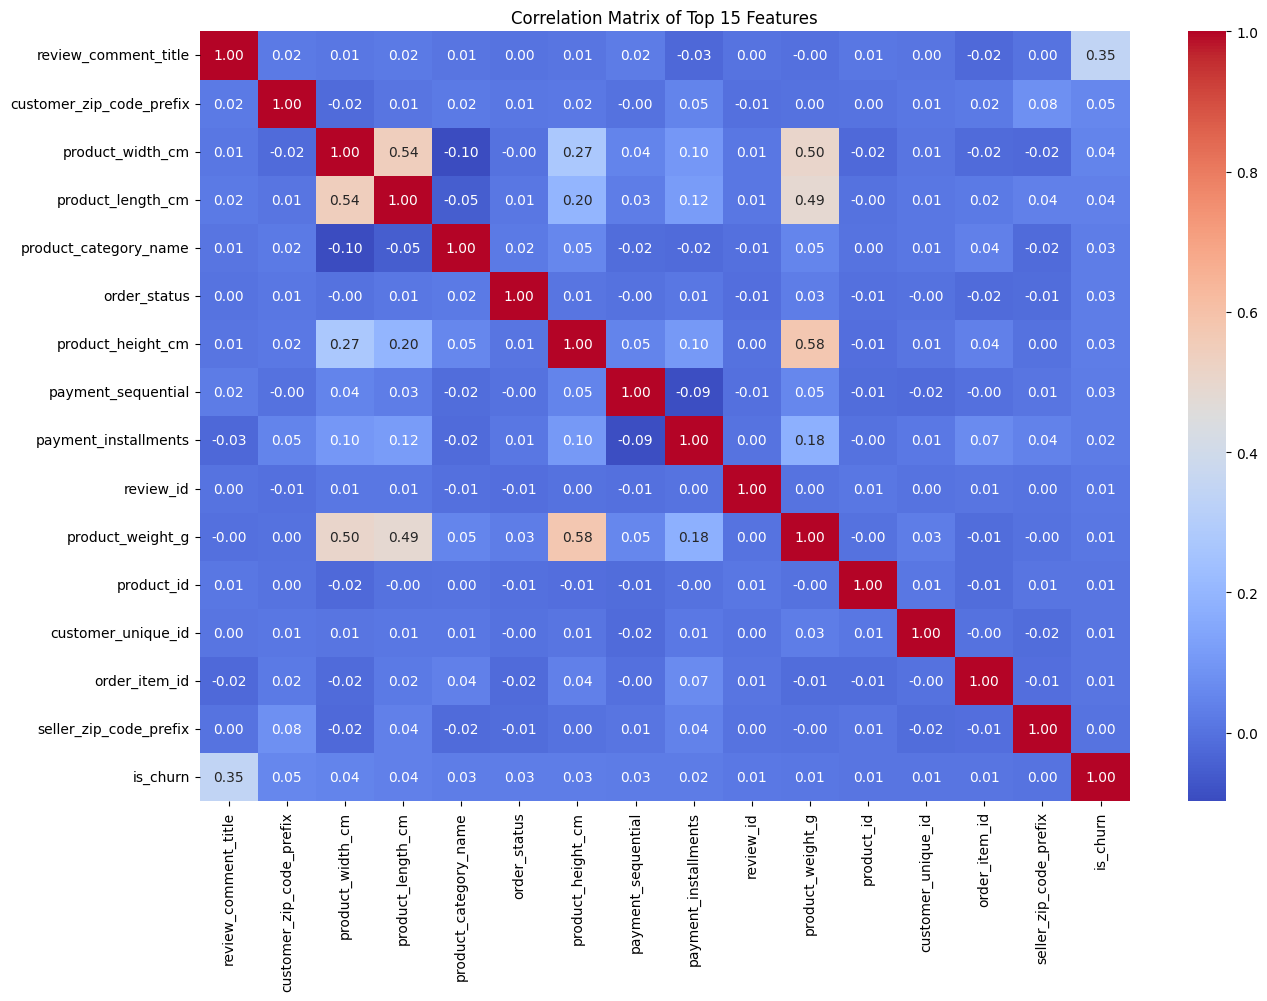

In [13]:
# Get the correlation of all columns with 'is_churn'
corr_with_churn = corr_matrix['is_churn'].sort_values(ascending=False)

# Select the top 15 features with highest correlation
top_15_features = corr_with_churn[1:16]  # Exclude 'is_churn' itself

# Create a new dataframe with selected features and 'is_churn'
new_df = balanced_df[top_15_features.index.tolist() + ['is_churn']]

# Calculate the correlation matrix for the new dataset
new_corr_matrix = new_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(new_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Top 15 Features')
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = balanced_df.drop('is_churn', axis=1)
y = balanced_df['is_churn']

# Remove datetime columns
for col in X.select_dtypes(include=['datetime64']):
  X = X.drop(col, axis=1)

# Remove columns with all missing values
X = X.dropna(axis=1, how='all')

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply NCA
nca = NeighborhoodComponentsAnalysis(n_components=None, random_state=42)
X_nca = nca.fit_transform(X_imputed, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nca, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9995454545454545
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1092
           1       1.00      1.00      1.00      1108

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



In [60]:
import pandas as pd

# Assuming 'df' is your existing DataFrame with data and 'top_10_features' is already defined
top_10_features = [
    'payment_value', 'price', 'freight_value', 'product_photos_qty',
    'product_weight_g', 'review_score', 'payment_installments',
    'order_item_id', 'product_length_cm', 'product_height_cm'
]

# Select the top 10 features from the dataset
top_10_df = balanced_df[top_10_features + ['is_churn']]

# Get the first 15 customers
sample_customers = top_10_df.head(10)

# Create a dictionary to store offers for each customer
offers = {}

# Iterate through the sample customers
for index, customer in sample_customers.iterrows():
    # Get the customer's values for the top 10 features
    customer_features = customer.to_dict()

    # Create a list to store offers for the customer
    customer_offers = []

    # Add churn status
    if customer_features['is_churn'] == 1:
        customer_offers.append("⚠️ Alert: This customer is at risk of churning. Consider offering additional incentives!")
    else:
        customer_offers.append("😊 Great news: This customer is loyal. Keep them engaged with special offers!")

    # Generate offers based on the customer's feature values
    if customer_features['payment_value'] > 100:
        customer_offers.append("🎁 Special treat: Get a free gift with your next order for your high-value purchases!")
    if customer_features['price'] > 50:
        customer_offers.append("💸 Exclusive discount: Save on your next purchase of high-value items!")
    if customer_features['freight_value'] > 20:
        customer_offers.append("🚚 Shipping discount: Get a shipping cost reduction on your next order!")
    if customer_features['product_photos_qty'] > 5:
        customer_offers.append("📸 Photo bonus: Enjoy a discount on your next purchase for your interest in detailed product information!")
    if customer_features['product_weight_g'] > 1000:
        customer_offers.append("📦 Shipping surprise: Free shipping on your next order for your heavy purchases!")
    if customer_features['review_score'] > 4:
        customer_offers.append("⭐ Thank you for your feedback: Exclusive discount for your positive reviews!")
    if customer_features['payment_installments'] < 2:
        customer_offers.append("🛒 Flexible payments: Enjoy extended payment options on your next purchase!")
    if customer_features['order_item_id'] > 2:
        customer_offers.append("🎉 Loyalty reward: Get a special discount for ordering multiple items!")
    if customer_features['product_length_cm'] > 30:
        customer_offers.append("📏 Big saver: Save on large items with a special discount!")
    if customer_features['product_height_cm'] > 10:
        customer_offers.append("🎈 Height bonus: Get a discount on tall items for your next purchase!")

    # Store the offers for the customer
    offers[index] = customer_offers

# Print the offers for each customer
for customer_id, offers_list in offers.items():
    print(f"Customer ID: {customer_id}")
    for offer in offers_list:
        print(offer)
    print("\n")


Customer ID: 73930
⚠️ Alert: This customer is at risk of churning. Consider offering additional incentives!
📦 Shipping surprise: Free shipping on your next order for your heavy purchases!
🛒 Flexible payments: Enjoy extended payment options on your next purchase!
🎈 Height bonus: Get a discount on tall items for your next purchase!


Customer ID: 48290
⚠️ Alert: This customer is at risk of churning. Consider offering additional incentives!
💸 Exclusive discount: Save on your next purchase of high-value items!
🛒 Flexible payments: Enjoy extended payment options on your next purchase!
🎈 Height bonus: Get a discount on tall items for your next purchase!


Customer ID: 70210
⚠️ Alert: This customer is at risk of churning. Consider offering additional incentives!
⭐ Thank you for your feedback: Exclusive discount for your positive reviews!
🛒 Flexible payments: Enjoy extended payment options on your next purchase!
🎈 Height bonus: Get a discount on tall items for your next purchase!


Customer ID